🧪 1. Linear SVM Classification

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import numpy as np

# Ambil dataset iris dan fokus ke dua kelas saja (binary)
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # Ambil fitur petal length dan width
y = (iris.target == 0).astype(int)  # Binary: hanya setosa (1) atau bukan (0)

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear SVM
svm_clf = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf.fit(X_scaled, y)

LinearSVC(C=1, loss='hinge', random_state=42)

🎨 2. Visualisasi Decision Boundary

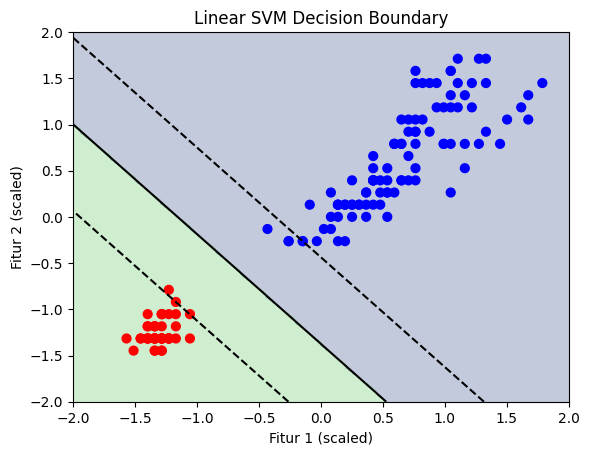

In [2]:
def plot_svm_decision_boundary(clf, X, y):
    x0s = np.linspace(-2, 2, 100)
    x1s = np.linspace(-2, 2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_grid = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.decision_function(X_grid).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred > 0, alpha=0.3)
    plt.contour(x0, x1, y_pred, colors=['k', 'k', 'k'], levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=40)
    plt.xlabel("Fitur 1 (scaled)")
    plt.ylabel("Fitur 2 (scaled)")
    plt.title("Linear SVM Decision Boundary")
    plt.show()

plot_svm_decision_boundary(svm_clf, X_scaled, y)

🧪 3. Nonlinear SVM Classification (RBF Kernel)

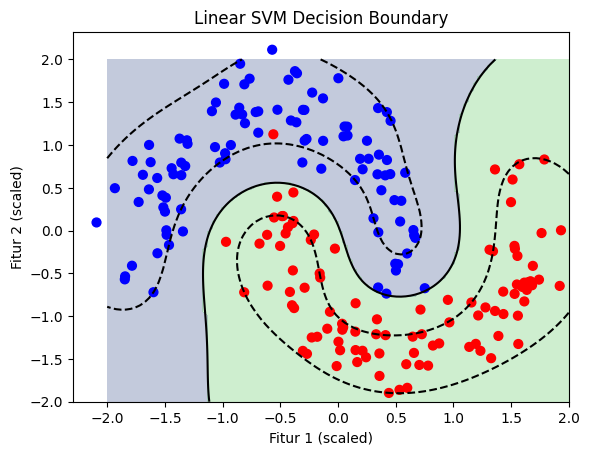

In [3]:
# Gunakan data bulan (moons) yang non-linear
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kernel SVM
rbf_clf = SVC(kernel="rbf", gamma=1, C=1)
rbf_clf.fit(X_scaled, y)

# Visualisasi
plot_svm_decision_boundary(rbf_clf, X_scaled, y)

🧪 4. Efek Hyperparameter C dan gamma

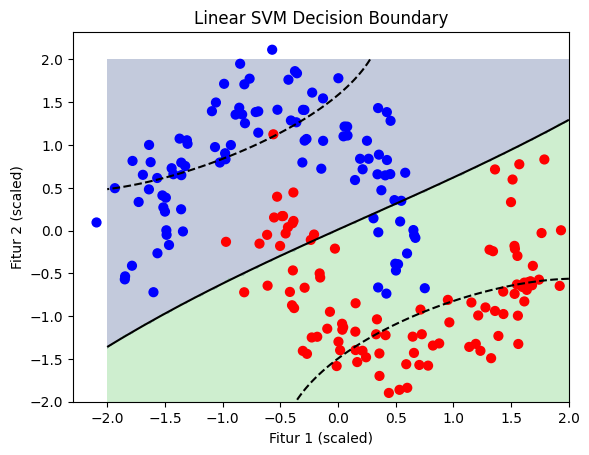

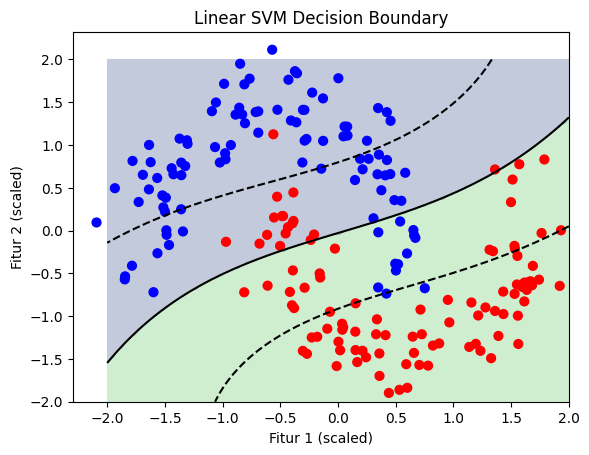

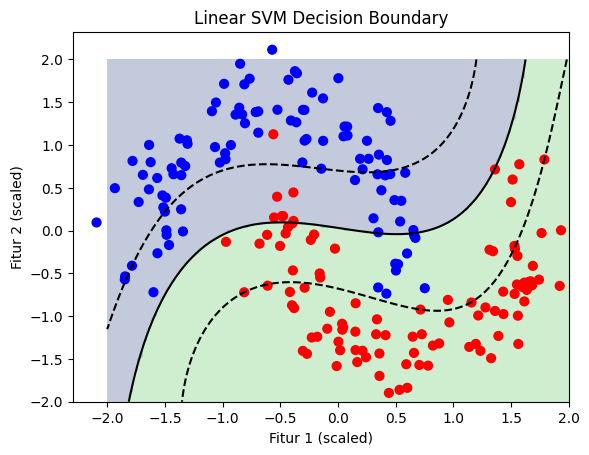

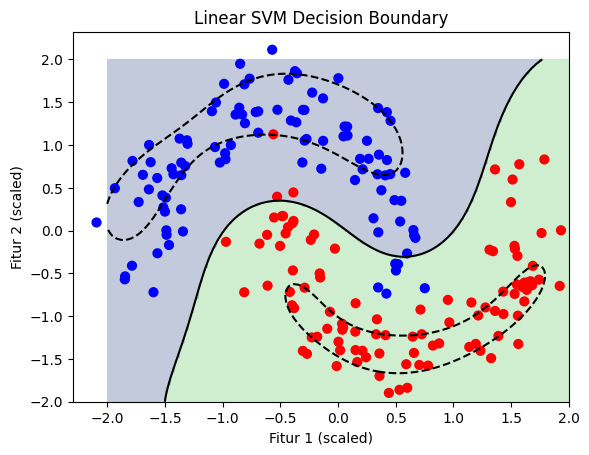

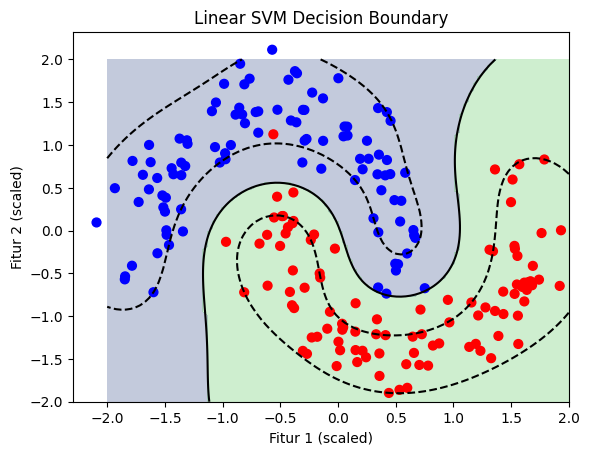

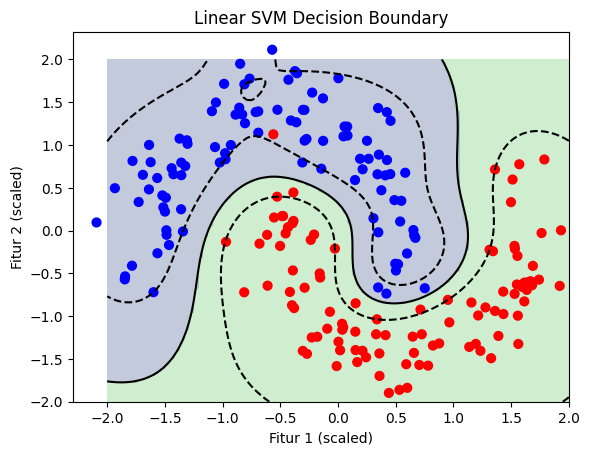

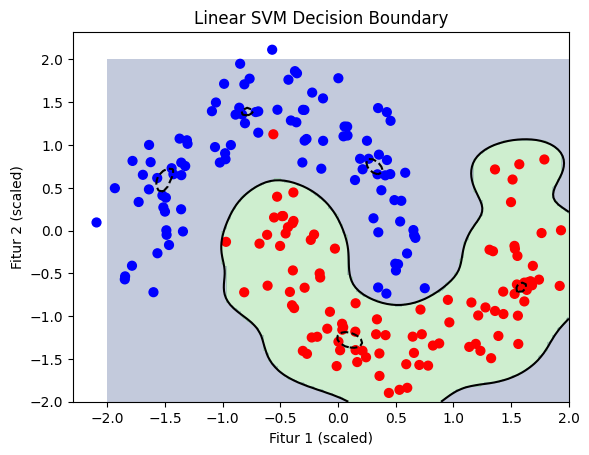

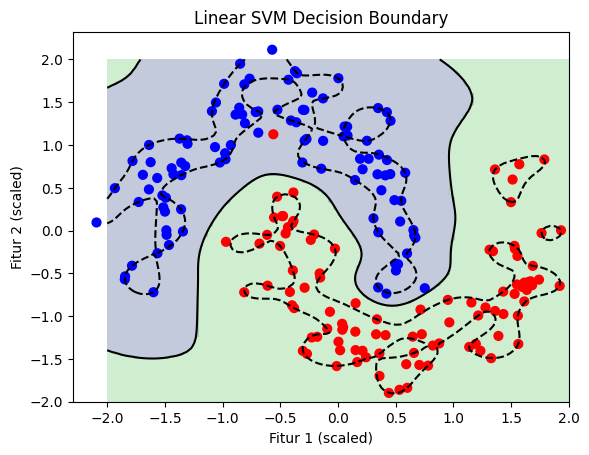

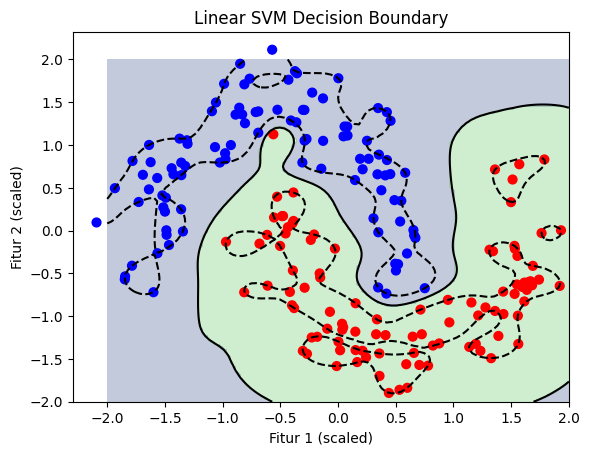

In [4]:
# Contoh pengaruh parameter C dan gamma
for gamma in [0.1, 1, 10]:
    for C in [0.1, 1, 10]:
        clf = SVC(kernel="rbf", gamma=gamma, C=C)
        clf.fit(X_scaled, y)
        plt.title(f"gamma={gamma}, C={C}")
        plot_svm_decision_boundary(clf, X_scaled, y)

🧪 5. SVM untuk Regresi (SVR)

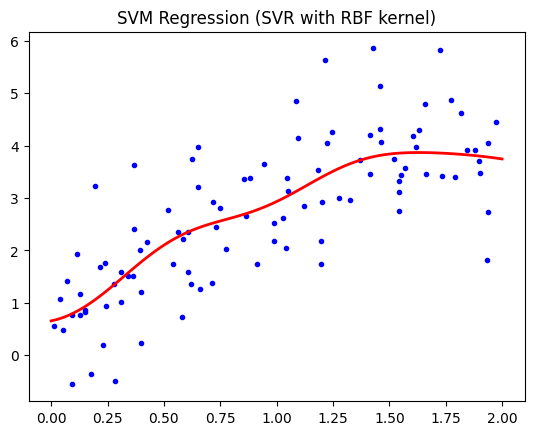

In [5]:
from sklearn.svm import SVR

# Dataset sederhana
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 * np.sin(X) + np.random.randn(100, 1)).ravel()

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SVR (RBF kernel)
svr_rbf = SVR(kernel="rbf", C=100, epsilon=0.1)
svr_rbf.fit(X_scaled, y)

# Prediksi & plot
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
y_pred = svr_rbf.predict(X_test_scaled)

plt.plot(X, y, "b.")
plt.plot(X_test, y_pred, "r-", linewidth=2)
plt.title("SVM Regression (SVR with RBF kernel)")
plt.show()

### ✅ Penjelasan:

* **LinearSVC** dan **SVC(kernel="linear")** menghasilkan model klasifikasi linier, cocok untuk data terpisah garis.
* **RBF kernel** membantu menangani data non-linear seperti pada dataset moons.
* **C dan gamma** adalah kunci untuk regularisasi dan kompleksitas model.
* **SVR** menggunakan prinsip SVM untuk membuat model regresi yang fleksibel dan robust.